In [2]:
import yfinance as yf                           
import riskfolio as rp 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")

tickers = 'SPY', 'IEF', 'IBIT', 'ETH-USD', 'SOL-USD', 
start = '2024-01-01' 
end = '2024-12-08'


data = yf.download(tickers, start ,end)

returns = data['Close'].pct_change().dropna()

print(returns)

[*********************100%%**********************]  5 of 5 completed


Ticker       ETH-USD      IBIT       IEF   SOL-USD       SPY
Date                                                        
2024-01-12 -0.036325 -0.062336  0.002709 -0.081960  0.000693
2024-01-13  0.020653  0.000000  0.000000  0.043710  0.000000
2024-01-14 -0.040502  0.000000  0.000000 -0.016681  0.000000
2024-01-15  0.015825  0.000000  0.000000  0.003793  0.000000
2024-01-16  0.030393 -0.010012 -0.008106  0.033196 -0.003671
...              ...       ...       ...       ...       ...
2024-12-03 -0.006445 -0.000367 -0.002845  0.037404  0.000464
2024-12-04  0.060933  0.035990  0.003805 -0.021695  0.006210
2024-12-05 -0.007894 -0.000354 -0.000105  0.021296 -0.001646
2024-12-06  0.051116  0.024823  0.003159  0.013044  0.001896
2024-12-07 -0.000778  0.000000  0.000000  0.006315  0.000000

[331 rows x 5 columns]


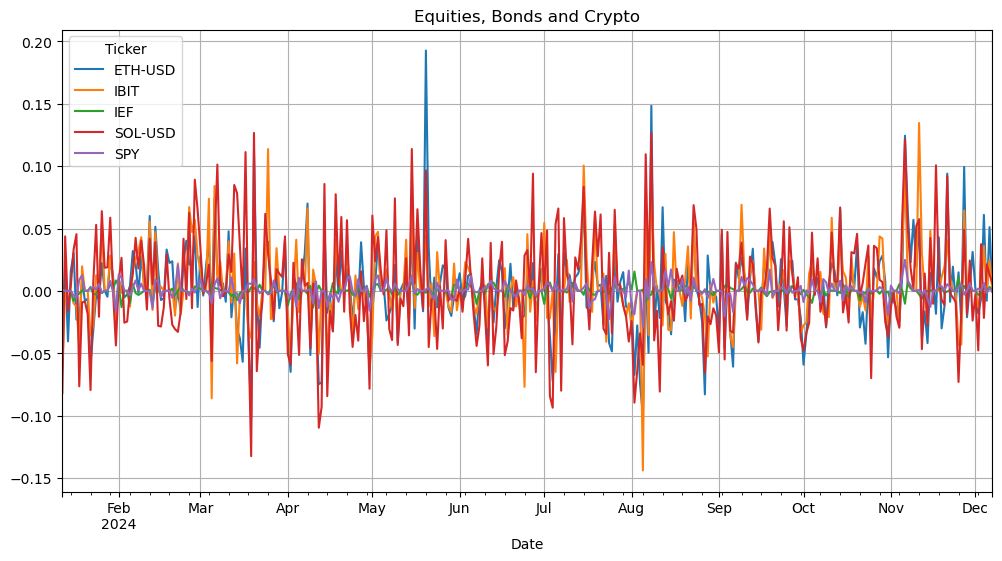

In [3]:
returns.plot(figsize = (12, 6 ))
plt.title('Equities, Bonds and Crypto') 
plt.xlabel = ('Date')
plt.ylabel = ('Return')
plt.grid(True)
plt.show()


Portfolio Optimize 

In [10]:
# Create a Portfolio object
port = rp.Portfolio(returns=returns)

# Create an optimization model
port.assets_stats(method_mu='hist', method_cov='hist')
model = 'Classic'  # Could also be 'BL' (Black-Litterman) or 'FM' (Factor Models)
rm = 'CVaR'         # Risk model / measure: 'MV' (Mean-Variance)/Standard Deviations, 'MAD'(Max Drawdown) , 'CVaR', etc.
obj = 'Sharpe'   # Objective: Sharpe Ratio, we can also use MinRisk , MaxRet
rf = 0            
weights = port.optimization(model=model, rm=rm, obj=obj , rf = rf)
print(weights)

              weights
ETH-USD  1.648383e-11
IBIT     1.218416e-01
IEF      3.408610e-01
SOL-USD  7.346692e-02
SPY      4.638305e-01


In [11]:
# Other Risk Metrics Available as per Riskfolio documentation 
"""
’MV’: Standard Deviation.
’MAD’: Mean Absolute Deviation.
’MSV’: Semi Standard Deviation.
’FLPM’: First Lower Partial Moment (Omega Ratio).
’SLPM’: Second Lower Partial Moment (Sortino Ratio).
’CVaR’: Conditional Value at Risk.
’EVaR’: Entropic Value at Risk.
’WR’: Worst Realization (Minimax)
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
’ADD’: Average Drawdown of uncompounded cumulative returns.
’DaR’: Drawdown at Risk of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.
’UCI’: Ulcer Index of uncompounded cumulative returns.

"""

'\n’MV’: Standard Deviation.\n’MAD’: Mean Absolute Deviation.\n’MSV’: Semi Standard Deviation.\n’FLPM’: First Lower Partial Moment (Omega Ratio).\n’SLPM’: Second Lower Partial Moment (Sortino Ratio).\n’CVaR’: Conditional Value at Risk.\n’EVaR’: Entropic Value at Risk.\n’WR’: Worst Realization (Minimax)\n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).\n’ADD’: Average Drawdown of uncompounded cumulative returns.\n’DaR’: Drawdown at Risk of uncompounded cumulative returns.\n’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.\n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.\n’UCI’: Ulcer Index of uncompounded cumulative returns.\n\n'

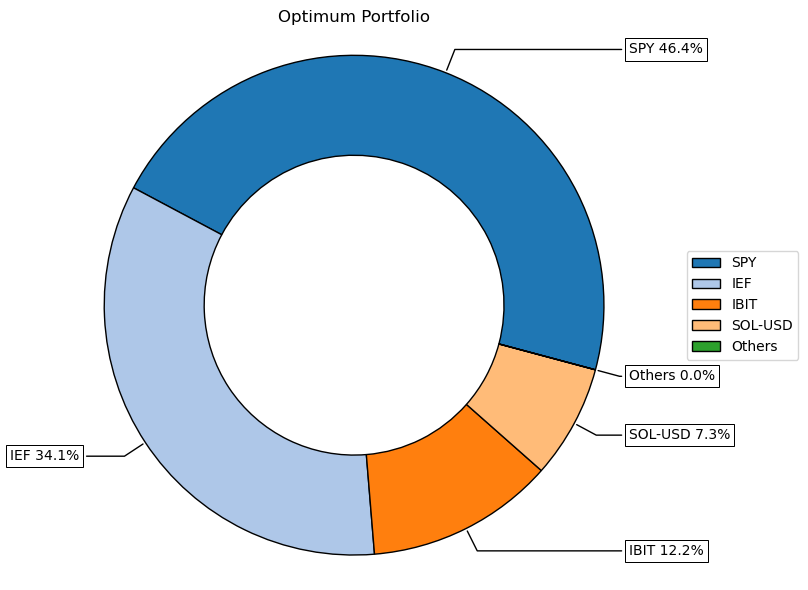

In [12]:
ax = rp.plot_pie(weights , title = "Optimum Portfolio", cmap = 'tab20')
plt.show()

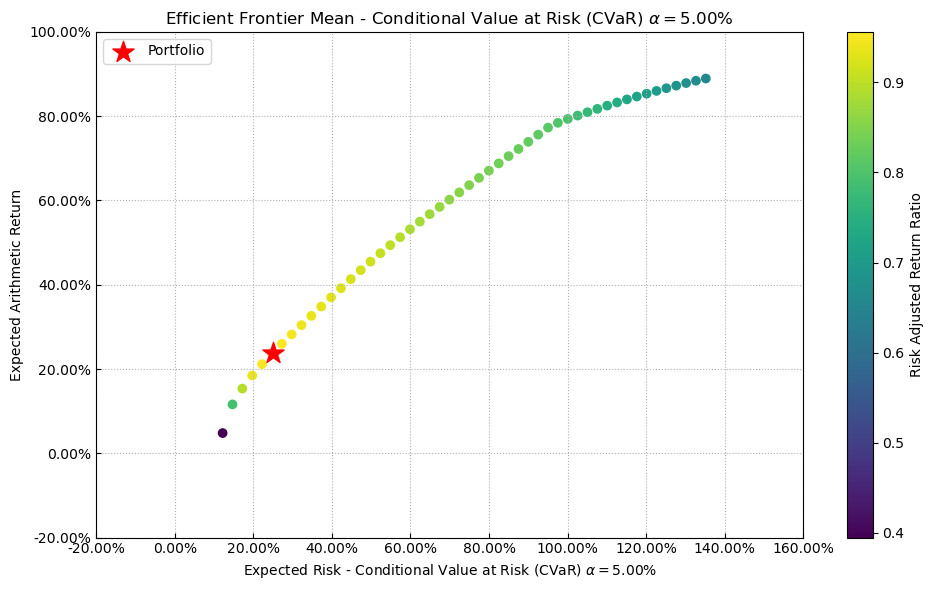

In [15]:
#Plotting Efficient Frontier 
hist = True
frontier = port.efficient_frontier(model = model, rm =rm , points = 50 , rf=rf , hist = hist)
ax = rp.plot_frontier(w_frontier = frontier , mu = port.mu , cov = port.cov , returns = returns , rm = rm , rf = rf, 
                      cmap = "viridis", w=weights)
plt.show()

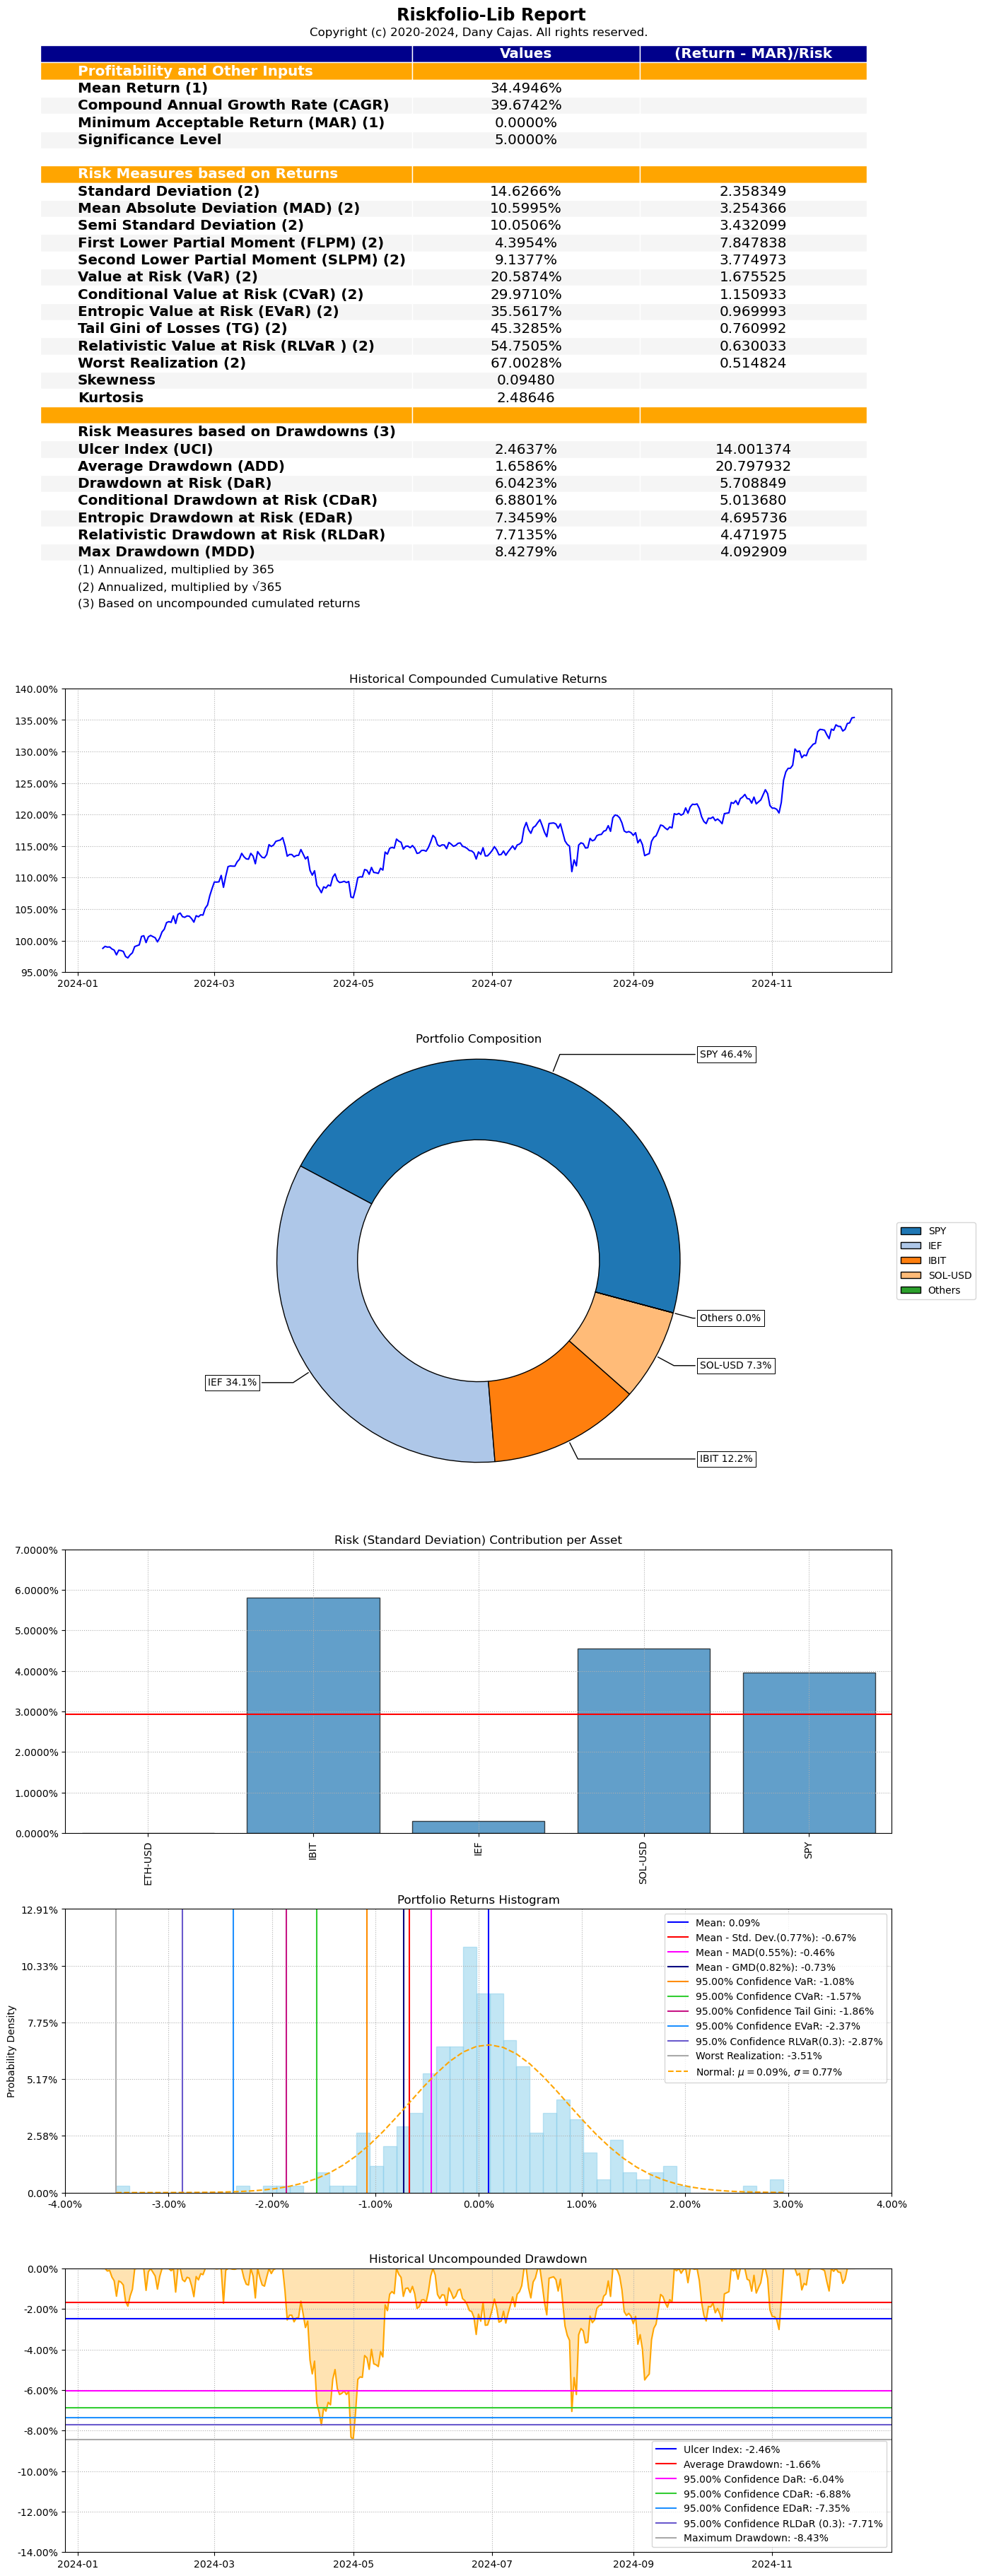

In [14]:
ax = rp.jupyter_report(returns , weights , t_factor = 365 , days_per_year = 365)
plt.show()